# Min Max scaling

In [1]:
# min max scaling is a technique of scaling our feature in such a way that their max=1 and min=0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("//Users//udayladdha//Desktop//DataSets//Social_Network_Ads.csv")


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=pd.read_csv("//Users//udayladdha//Desktop//DataSets//Social_Network_Ads.csv")
np.round(df.describe(),2)   # min and max value before scaling

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


In [6]:
df=df.drop(columns=["Gender"])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df.drop(columns=["Purchased"])
y=df["Purchased"]

In [9]:
x_train , x_test ,y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=23)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
ms=MinMaxScaler()

In [12]:
x_train_scaled=ms.fit_transform(x_train)
x_test_scaled=ms.transform(x_test)

In [13]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns) # transformins data into dataframe as minmaxscaler return data in array format
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [14]:
np.round(x_train.describe(),2) # before scaling value of min and max

,User ID,Age,EstimatedSalary
count,320.00,320.00,320.00
mean,15694555.27,37.74,69543.75
std,72606.66,10.58,33459.35
min,15569641.00,18.00,15000.00
25%,15629435.00,29.75,43750.00
50%,15697630.00,37.00,70000.00
75%,15756848.00,45.00,87250.00
max,15815236.00,60.00,150000.00


In [15]:
np.round(x_train_scaled.describe(),2) # after scaling value of min and max

,User ID,Age,EstimatedSalary
count,320.00,320.00,320.00
mean,0.51,0.47,0.40
std,0.30,0.25,0.25
min,0.00,0.00,0.00
25%,0.24,0.28,0.21
50%,0.52,0.45,0.41
75%,0.76,0.64,0.54
max,1.00,1.00,1.00


<Axes: title={'center': 'after MinMax'}, xlabel='EstimatedSalary', ylabel='Density'>

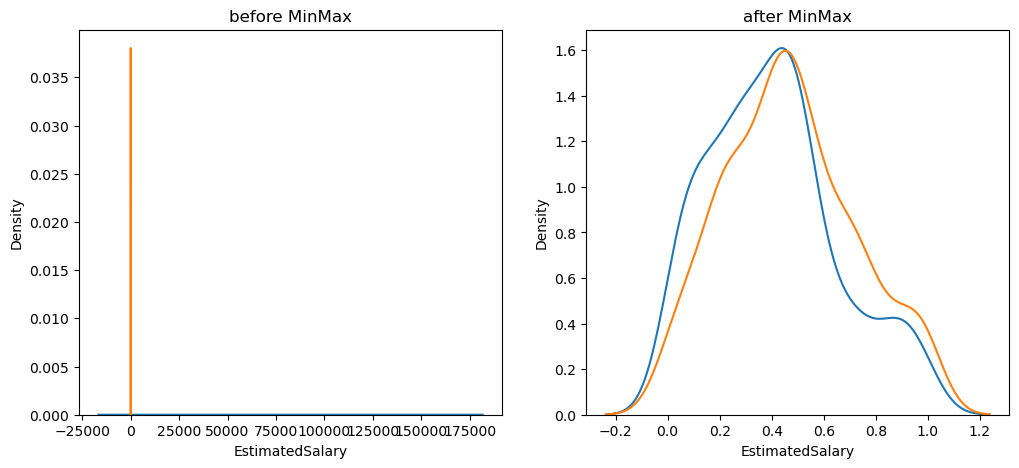

In [16]:
fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title("before MinMax")
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1)
sns.kdeplot(x_train["Age"],ax=ax1)

# after minamx
ax2.set_title("after MinMax")
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)
sns.kdeplot(x_train_scaled["Age"],ax=ax2)